<a href="https://colab.research.google.com/github/ullasbc02/obesity-risk-analytics/blob/main/02_eda_spatial_temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
PATH = '/content/drive/MyDrive/obesity-analytics-notebooks/Multi-Year-Trend/Dataset'
df = pd.read_csv(
    os.path.join(PATH, 'final_clean_county_panel_2010_2023.csv'),
    dtype={"geoId": str}
)
DATA = "/content/drive/MyDrive/obesity-risk-analytics/dashboard_data_final/"
# GEOJSON
with open(DATA + "counties_fips.geojson", "r") as f:
    counties_geojson = json.load(f)
df["fips"] = df["fips"].astype(str).str.zfill(5)
df

,geoid,year,county_name,state_abbr,metro_nonmetro,obesity_rate,poverty_rate,physical_inactivity,median_household_income,unemployment_rate,fips
0,us-ct-001,2010,Fairfield County,CT,Metropolitan,0.183000,0.093000,0.197000,74634.0,0.088472,09001
1,us-ct-001,2011,Fairfield County,CT,Metropolitan,0.191000,0.094000,0.205000,77065.0,0.083891,09001
2,us-ct-001,2012,Fairfield County,CT,Metropolitan,0.206000,0.089000,0.197000,79536.0,0.077980,09001
3,us-ct-001,2013,Fairfield County,CT,Metropolitan,0.211000,0.096000,0.208000,81816.0,0.074060,09001
4,us-ct-001,2014,Fairfield County,CT,Metropolitan,0.218000,0.090000,0.189000,85336.0,0.061873,09001
...,...,...,...,...,...,...,...,...,...,...,...
43983,us-ct-160,2019,Northwest Hills Planning Region,CT,Nonmetropolitan,0.306006,0.134006,0.246007,53366.5,0.036933,09160
43984,us-ct-160,2020,Northwest Hills Planning Region,CT,Nonmetropolitan,0.308004,0.128002,0.227007,55153.0,0.065901,09160
43985,us-ct-160,2021,Northwest Hills Planning Region,CT,Nonmetropolitan,0.315006,0.136000,0.222020,56632.0,0.044242,09160
43986,us-ct-160,2022,Northwest Hills Planning Region,CT,Nonmetropolitan,0.278002,0.079001,0.186000,87206.0,0.034412,09160


In [ ]:
df[["geoid", "year"]].duplicated().sum()

np.int64(0)

In [ ]:
df.isna().mean().sort_values(ascending=False)


,0
geoid,0.0
year,0.0
county_name,0.0
state_abbr,0.0
metro_nonmetro,0.0
obesity_rate,0.0
poverty_rate,0.0
physical_inactivity,0.0
median_household_income,0.0
unemployment_rate,0.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43988 entries, 0 to 43987
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   geoid                    43988 non-null  object 
 1   year                     43988 non-null  int64  
 2   county_name              43988 non-null  object 
 3   state_abbr               43988 non-null  object 
 4   metro_nonmetro           43988 non-null  object 
 5   obesity_rate             43988 non-null  float64
 6   poverty_rate             43988 non-null  float64
 7   physical_inactivity      43988 non-null  float64
 8   median_household_income  43988 non-null  float64
 9   unemployment_rate        43988 non-null  float64
 10  fips                     43988 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 3.7+ MB


In [ ]:
national_trend = (
    df.groupby("year")["obesity_rate"]
    .mean()
    .reset_index()
)

national_trend.head()


,year,obesity_rate
0,2010,0.265393
1,2011,0.270840
2,2012,0.274369
3,2013,0.279548
4,2014,0.283139


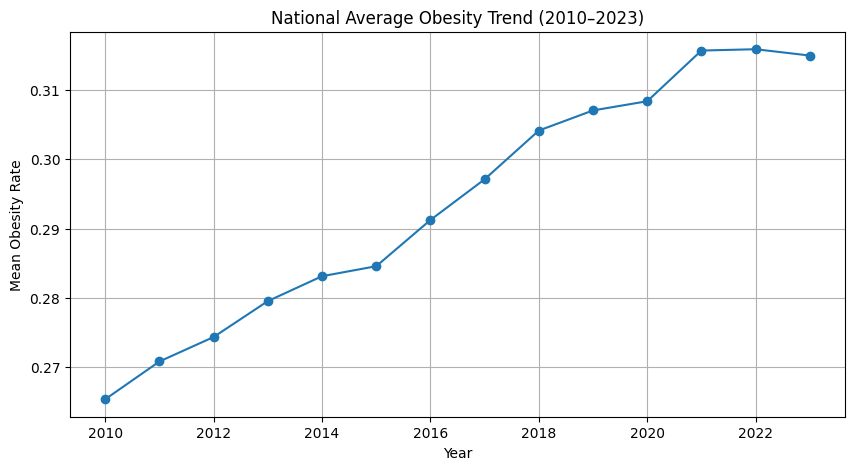

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(
    national_trend["year"],
    national_trend["obesity_rate"],
    marker="o"
)

plt.title("National Average Obesity Trend (2010–2023)")
plt.xlabel("Year")
plt.ylabel("Mean Obesity Rate")
plt.grid(True)
plt.show()


In [ ]:
start = national_trend.iloc[0]["obesity_rate"]
end = national_trend.iloc[-1]["obesity_rate"]

print("2010 National Obesity:", round(start, 4))
print("2023 National Obesity:", round(end, 4))
print("Absolute Change:", round(end - start, 4))
print("Percent Increase:", round((end - start) / start * 100, 2), "%")


2010 National Obesity: 0.2654
2023 National Obesity: 0.315
Absolute Change: 0.0496
Percent Increase: 18.68 %


In [ ]:
state_year = (
    df.groupby(["state_abbr", "year"])["obesity_rate"]
    .mean()
    .reset_index()
)

state_year.head()

,state_abbr,year,obesity_rate
0,AK,2010,0.268555
1,AK,2011,0.270238
2,AK,2012,0.279543
3,AK,2013,0.279329
4,AK,2014,0.282003


In [ ]:
state_2010 = state_year[state_year["year"] == 2010][["state_abbr", "obesity_rate"]]
state_2023 = state_year[state_year["year"] == 2023][["state_abbr", "obesity_rate"]]

state_change = state_2010.merge(
    state_2023, on="state_abbr", suffixes=("_2010", "_2023")
)

state_change["absolute_change"] = (
    state_change["obesity_rate_2023"] - state_change["obesity_rate_2010"]
)

state_change["percent_change"] = (
    state_change["absolute_change"] / state_change["obesity_rate_2010"] * 100
)

state_change.sort_values("absolute_change", ascending=False).head()


,state_abbr,obesity_rate_2010,obesity_rate_2023,absolute_change,percent_change
35,OH,0.273719,0.361300,0.087581,31.996627
48,WI,0.263201,0.344370,0.081168,30.838877
29,NE,0.255384,0.335433,0.080049,31.344665
12,IA,0.252274,0.331331,0.079057,31.337832
28,ND,0.245308,0.318250,0.072942,29.735033


In [ ]:
top_increasing = state_change.sort_values(
    "absolute_change", ascending=False
).head(10)

top_increasing

,state_abbr,obesity_rate_2010,obesity_rate_2023,absolute_change,percent_change
35,OH,0.273719,0.361300,0.087581,31.996627
48,WI,0.263201,0.344370,0.081168,30.838877
29,NE,0.255384,0.335433,0.080049,31.344665
12,IA,0.252274,0.331331,0.079057,31.337832
28,ND,0.245308,0.318250,0.072942,29.735033
23,MN,0.246162,0.317729,0.071567,29.072933
49,WV,0.278701,0.348412,0.069712,25.013037
34,NY,0.259197,0.324681,0.065484,25.264141
16,KS,0.255040,0.317360,0.062319,24.435146
50,WY,0.247620,0.309849,0.062229,25.130658


In [ ]:
top_improving = state_change.sort_values(
    "absolute_change", ascending=True
).head(10)

top_improving

,state_abbr,obesity_rate_2010,obesity_rate_2023,absolute_change,percent_change
5,CO,0.219708,0.236608,0.016899,7.691660
11,HI,0.229938,0.247734,0.017796,7.739403
4,CA,0.244194,0.262937,0.018743,7.675259
0,AK,0.268555,0.291260,0.022705,8.454526
7,DC,0.211000,0.235000,0.024000,11.374366
18,LA,0.288430,0.312757,0.024327,8.434409
1,AL,0.292843,0.317903,0.025060,8.557548
19,MA,0.234217,0.260216,0.025999,11.100300
25,MS,0.300168,0.326256,0.026089,8.691383
40,SC,0.312396,0.341658,0.029262,9.367029


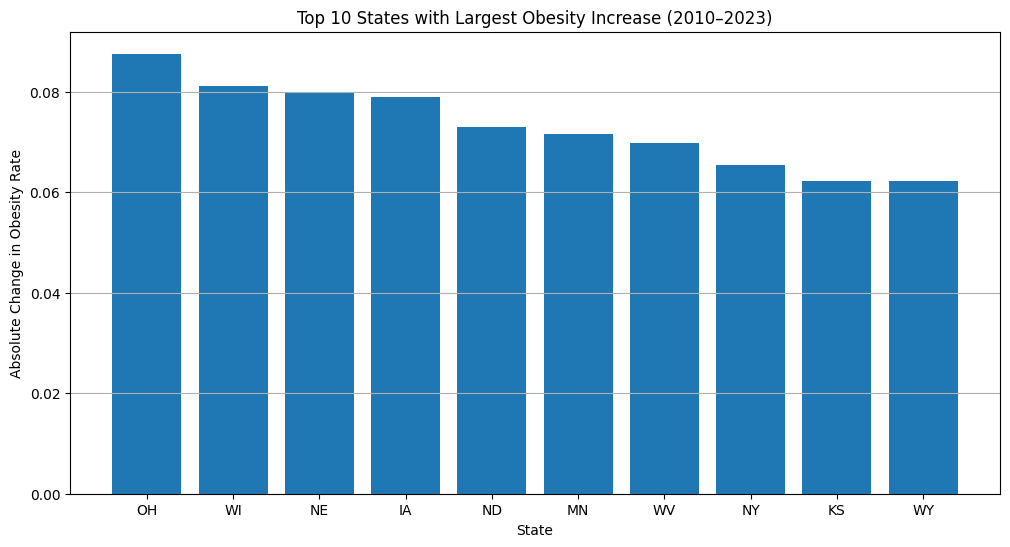

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(top_increasing["state_abbr"], top_increasing["absolute_change"])
plt.title("Top 10 States with Largest Obesity Increase (2010–2023)")
plt.xlabel("State")
plt.ylabel("Absolute Change in Obesity Rate")
plt.grid(axis="y")
plt.show()


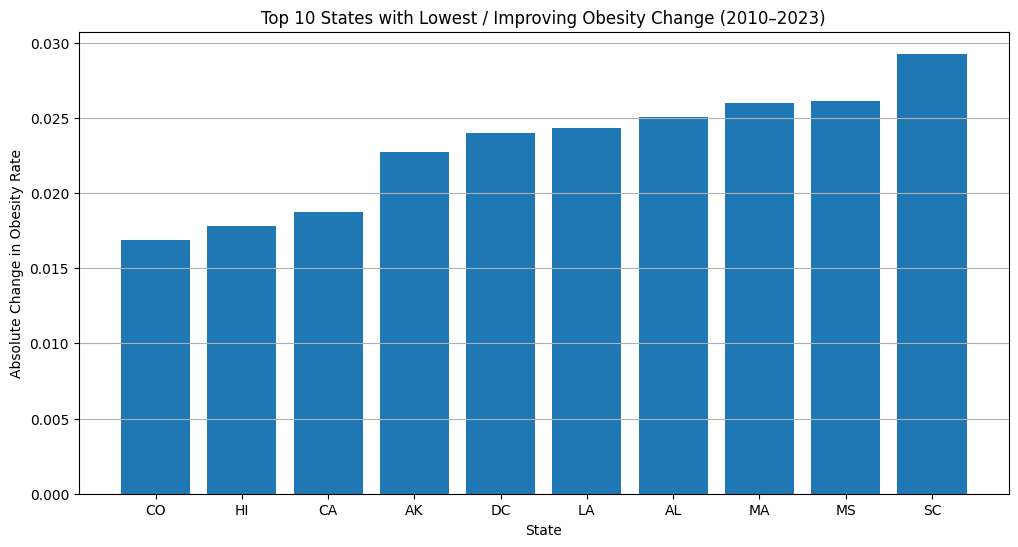

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(top_improving["state_abbr"], top_improving["absolute_change"])
plt.title("Top 10 States with Lowest / Improving Obesity Change (2010–2023)")
plt.xlabel("State")
plt.ylabel("Absolute Change in Obesity Rate")
plt.grid(axis="y")
plt.show()


In [ ]:
numeric_cols = [
    "obesity_rate",
    "poverty_rate",
    "physical_inactivity",
    "median_household_income",
    "unemployment_rate"
]

df_num = df[numeric_cols]


In [ ]:
corr = df_num.corr()
corr

,obesity_rate,poverty_rate,physical_inactivity,median_household_income,unemployment_rate
obesity_rate,1.000000,0.126914,0.516519,-0.005308,-0.136375
poverty_rate,0.126914,1.000000,0.395981,-0.739036,0.468004
physical_inactivity,0.516519,0.395981,1.000000,-0.443931,0.157767
median_household_income,-0.005308,-0.739036,-0.443931,1.000000,-0.468210
unemployment_rate,-0.136375,0.468004,0.157767,-0.468210,1.000000


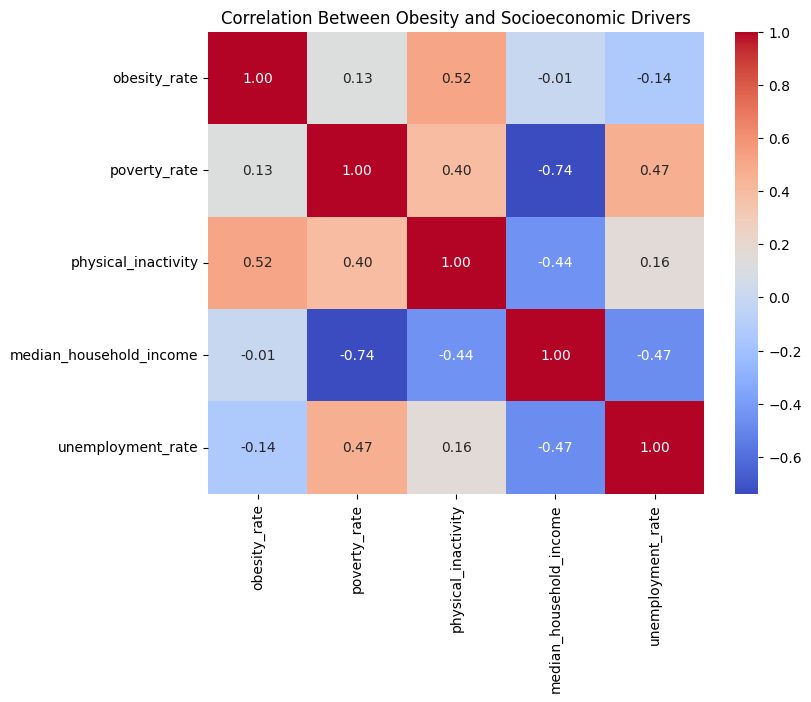

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Obesity and Socioeconomic Drivers")
plt.show()


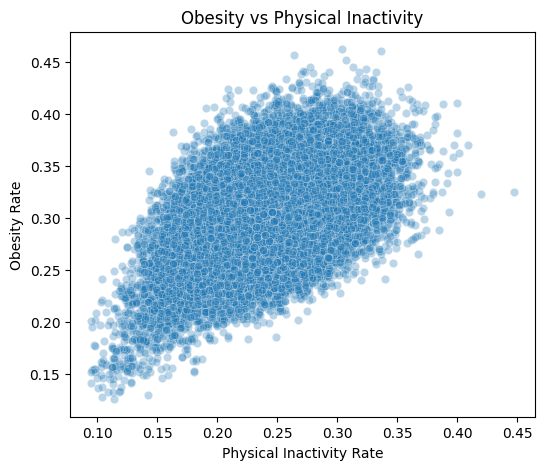

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="physical_inactivity", y="obesity_rate", data=df, alpha=0.3)
plt.title("Obesity vs Physical Inactivity")
plt.xlabel("Physical Inactivity Rate")
plt.ylabel("Obesity Rate")
plt.show()

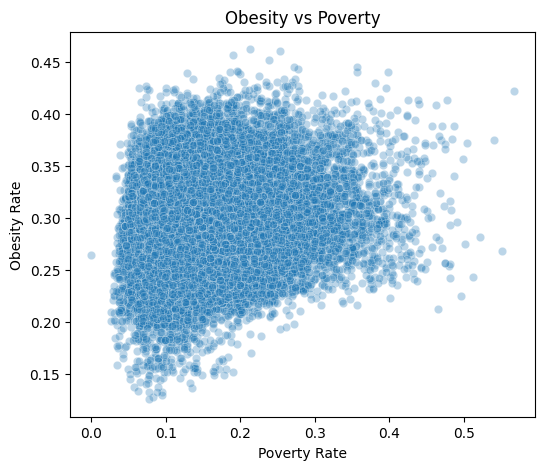

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="poverty_rate", y="obesity_rate", data=df, alpha=0.3)
plt.title("Obesity vs Poverty")
plt.xlabel("Poverty Rate")
plt.ylabel("Obesity Rate")
plt.show()


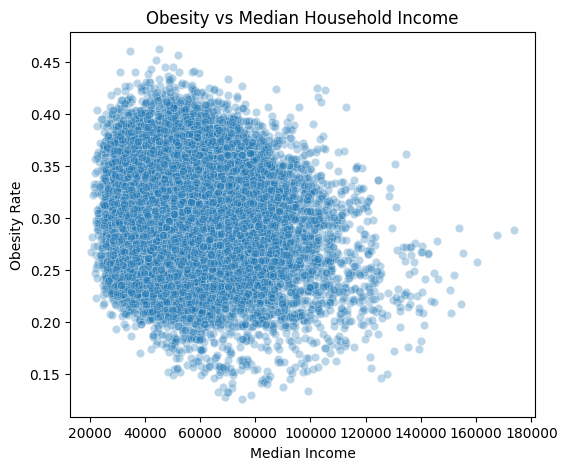

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="median_household_income", y="obesity_rate", data=df, alpha=0.3)
plt.title("Obesity vs Median Household Income")
plt.xlabel("Median Income")
plt.ylabel("Obesity Rate")
plt.show()


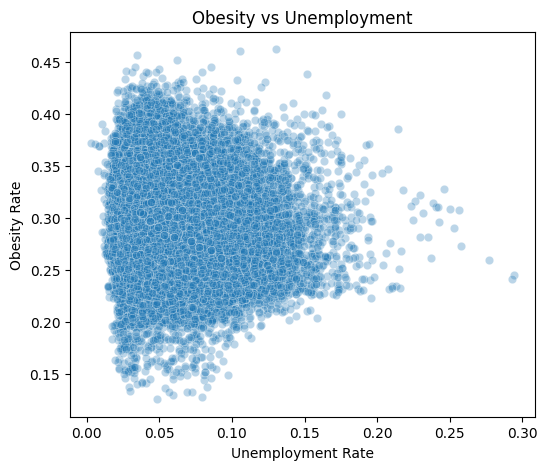

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="unemployment_rate", y="obesity_rate", data=df, alpha=0.3)
plt.title("Obesity vs Unemployment")
plt.xlabel("Unemployment Rate")
plt.ylabel("Obesity Rate")
plt.show()


In [ ]:
list(counties_geojson["features"][0]["properties"].keys())

['GEO_ID', 'STATE', 'COUNTY', 'NAME', 'LSAD', 'CENSUSAREA']

In [ ]:
map_years = [2010, 2016, 2023]

map_df = df[df["year"].isin(map_years)].copy()

map_df["fips"] = map_df["fips"].astype(str).str.zfill(5)


In [ ]:
import plotly.express as px


In [ ]:
df_2010 = map_df[map_df["year"] == 2010]

fig_2010 = px.choropleth(
    df_2010,
    geojson=counties_geojson,
    locations="fips",
    color="obesity_rate",
    scope="usa",
    color_continuous_scale="Reds",
    title="County-Level Obesity (2010)",
    labels={"obesity_rate": "Obesity Rate"},
    hover_name="county_name"
)

fig_2010.update_geos(fitbounds="locations", visible=False)
fig_2010.show()


In [ ]:
df_2016 = map_df[map_df["year"] == 2016]

fig_2016 = px.choropleth(
    df_2016,
    geojson=counties_geojson,
    locations="fips",
    color="obesity_rate",
    scope="usa",
    color_continuous_scale="Reds",
    title="County-Level Obesity (2016)",
    labels={"obesity_rate": "Obesity Rate"},
    hover_name="county_name"
)

fig_2016.update_geos(fitbounds="locations", visible=False)
fig_2016.show()


In [ ]:
df_2023 = map_df[map_df["year"] == 2023]

fig_2023 = px.choropleth(
    df_2023,
    geojson=counties_geojson,
    locations="fips",
    color="obesity_rate",
    scope="usa",
    color_continuous_scale="Reds",
    title="County-Level Obesity (2023)",
    labels={"obesity_rate": "Obesity Rate"},
    hover_name="county_name"
)

fig_2023.update_geos(fitbounds="locations", visible=False)
fig_2023.show()
